In [ ]:
%pip install pandas
%pip install nbconvert

In [92]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import  mean_squared_error
import numpy as np

oCelsiusValhalla = pd.read_csv('/content/Valhalla23.csv')


In [93]:
# Dividir los datos en conjuntos de entrenamiento y prueba
oCelsiusValhallaTrain, oTest = train_test_split(oCelsiusValhalla, test_size=0.2)
oTrain, oValidacion = train_test_split(oCelsiusValhallaTrain, test_size=0.5)

print("Tamaño Train: ", len(oTrain))
print("Tamaño Validacion: ", len(oValidacion))
print("Tamaño Test: ", len(oTest))
# Crear el modelo de regresión lineal
oModelo1 = SGDRegressor(eta0=1E-4,max_iter=1000000,random_state=835194)

oModelo1.fit(oTrain[["Celsius"]], oTrain["Valks"])

oYPredTrain = oModelo1.predict(oTrain[["Celsius"]])
oYPredValidacion = oModelo1.predict(oValidacion[["Celsius"]])
oYPredTest = oModelo1.predict(oTest[["Celsius"]])

Tamaño Train:  40
Tamaño Validacion:  40
Tamaño Test:  20


Mean Squared Error Training:  1271.507141428822


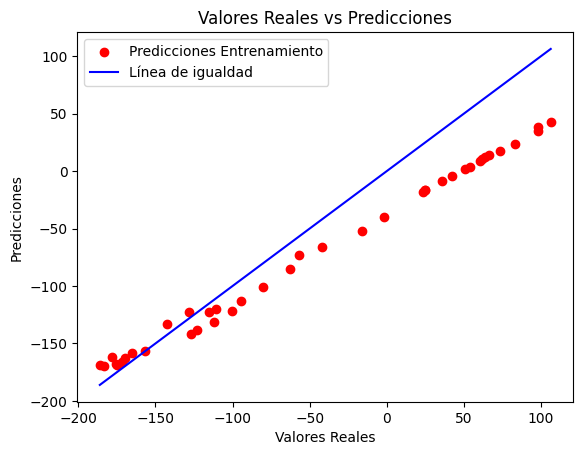

In [110]:
fTrainMSE = mean_squared_error(oTrain["Valks"], oYPredTrain)
print("Mean Squared Error Training: ", fTrainMSE)

plt.scatter(oTrain["Valks"], oYPredTrain, color='red', label='Predicciones Entrenamiento')
plt.plot([oTrain["Valks"].min(), oTrain["Valks"].max()], [oTrain["Valks"].min(), oTrain["Valks"].max()], color ='blue', label = "Línea de igualdad")
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.legend()
plt.show()


Mean Squared Error Validacion:  793.0406433319511


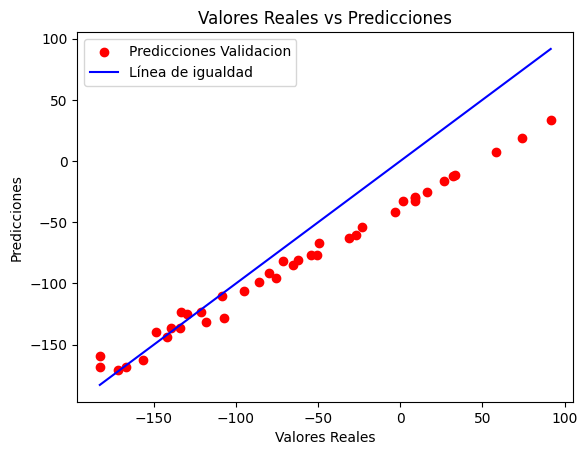

In [111]:
fValidacionMSE = mean_squared_error(oValidacion["Valks"], oYPredValidacion)
print("Mean Squared Error Validacion: ", fValidacionMSE)

plt.scatter(oValidacion["Valks"], oYPredValidacion, color='red', label='Predicciones Validacion')
plt.plot([oValidacion["Valks"].min(), oValidacion["Valks"].max()], [oValidacion["Valks"].min(), oValidacion["Valks"].max()], color ='blue', label = "Línea de igualdad")
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.legend()
plt.show()

Mean Squared Error Test:  793.0406433319511


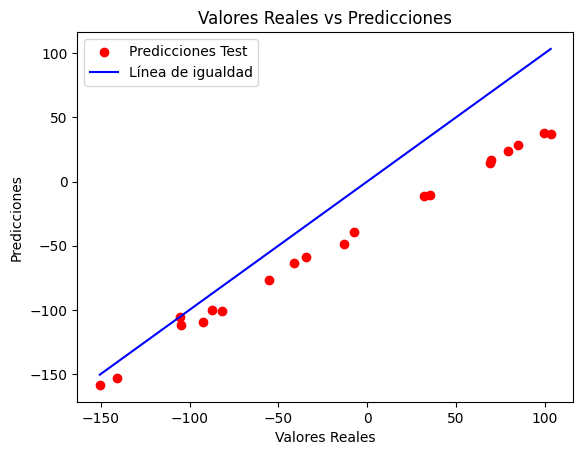

In [96]:
fTestMSE = mean_squared_error(oTest["Valks"], oYPredTest)
print("Mean Squared Error Test: ", mse)

plt.scatter(oTest["Valks"], oYPredTest, color='red', label='Predicciones Test')
plt.plot([oTest["Valks"].min(), oTest["Valks"].max()], [oTest["Valks"].min(), oTest["Valks"].max()], color ='blue', label = "Línea de igualdad")
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.legend()
plt.show()

In [97]:
oInstances = np.random.choice(range(3, 40), 20, replace=False)
oInstances[0] = 2 # Para que siempre tenga el valor 2
oInstances = sorted(oInstances) # Ordenamos las instancias
print(oInstances)

[2, 4, 7, 8, 9, 10, 11, 13, 17, 18, 21, 23, 26, 27, 30, 31, 32, 36, 38, 39]


In [104]:
oTrainErrors = []
oValErrors = []

for instance in oInstances:
    oTrainMSETemp = []
    oValMSETemp = []
    for _ in range(100):

        oTrainSubset = oCelsiusValhalla.sample(n=instance)
        oModeloTemp = SGDRegressor(eta0=1E-4, max_iter=1000000)
        oModeloTemp.fit(oTrainSubset[['Celsius']], oTrainSubset['Valks'])

        # Cálculo del MSE
        fTrainingMSE = mean_squared_error(oTrainSubset['Valks'], oModeloTemp.predict(oTrainSubset[['Celsius']]))
        fValidacionMSE = mean_squared_error(oValidacion['Valks'], oModeloTemp.predict(oValidacion[['Celsius']]))
        oTrainMSETemp.append(fTrainingMSE)
        oValMSETemp.append(fValidacionMSE)

    # Almacenar los errores promedios
    oTrainErrors.append(np.mean(oTrainMSETemp))
    oValErrors.append(np.mean(oValMSETemp))


In [105]:
print(len(oTrainErrors))
print(len(oValErrors))


20
20


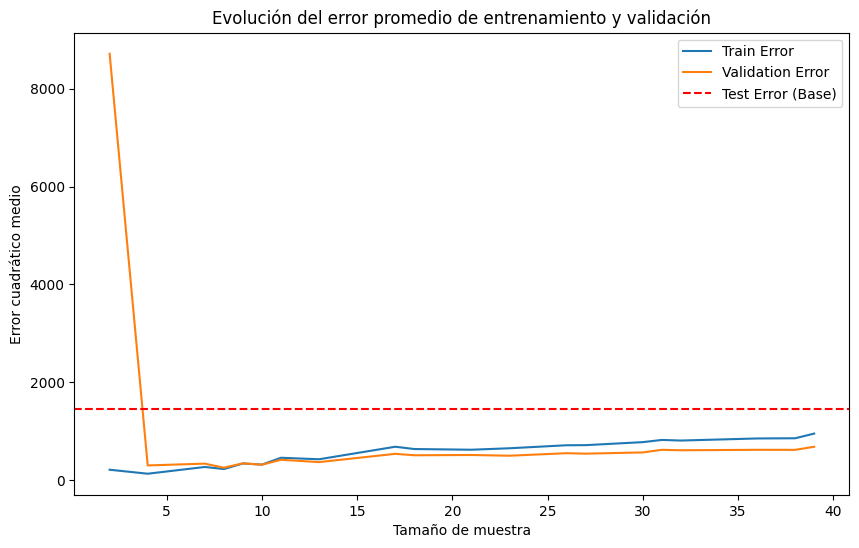

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(oInstances , oTrainErrors, label='Train Error')
plt.plot(oInstances , oValErrors, label='Validation Error')
plt.axhline(y=fTestMSE, color='red', linestyle='--', label='Test Error (Base)')
plt.xlabel('Tamaño de muestra')
plt.ylabel('Error cuadrático medio')
plt.title('Evolución del error promedio de entrenamiento y validación')
plt.legend()
plt.show()


En esta grafica se puede ver que el caso de validacion empezo con un error muy grande y fue disminuyendo mientras más modelos iban siendo ejecutados. En el caso de los datos de Training el tamaño de la muestra era muy importante para el error cuadratico, ya que mientras el tamaño de la muestra iba aumentando el Error Cuadratico tambien lo hacia.

Despues de ver la grafica el tamaño de muestra adecuado podemo dejarlo a 20 muestas para tener suficiente información sin necesidad de aumentar mucho el error cuadratico

In [121]:
iTamañoOptimo = 20
oTrainOptimal = oCelsiusValhalla.sample(n=iTamañoOptimo)
oModeloOptimo = SGDRegressor( eta0=1E-4, max_iter=1000000)
oModeloOptimo.fit(oTrainOptimal[['Celsius']], oTrainOptimal['Valks'])

oYPredTrainOpt = oModeloOptimo.predict(oTrain[["Celsius"]])
oYPredValidacionOpt = oModeloOptimo.predict(oValidacion[["Celsius"]])
oYPredTestOpt = oModeloOptimo.predict(oTest[["Celsius"]])

In [122]:
fTrainOptMSE = mean_squared_error(oTrain["Valks"], oYPredTrainOpt)
fValidacionOptMSE = mean_squared_error(oValidacion["Valks"], oYPredValidacionOpt)
fTestOptMSE = mean_squared_error(oTest["Valks"], oYPredTestOpt)

print("Modelo 1")
print("Mean Squared Error Training: ", fTrainMSE)
print("Mean Squared Error Validation: ", fValidacionMSE)
print("Mean Squared Error Test: ", fTestMSE)

print("Modelo Optimo")
print("Mean Squared Error Training: ", fTrainOptMSE)
print("Mean Squared Error Validation: ", fValidacionOptMSE)
print("Mean Squared Error Test: ", fTestOptMSE)


Modelo 1
Mean Squared Error Training:  1271.507141428822
Mean Squared Error Validation:  793.0406433319511
Mean Squared Error Test:  1459.7224788768303
Modelo Optimo
Mean Squared Error Training:  87.82765616177105
Mean Squared Error Validation:  73.54517172970229
Mean Squared Error Test:  75.09330504002091


Con estos datos se puede confirmar que el error si bajo mucho con el numero de muestra, asi que con esto podemos confirmar que con un numero adecuado de muestras la prediccion puede ser mucho mejor sin necesidad de agregar todos los datos

In [123]:
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

KeyboardInterrupt: 